#### Took the NIFTY's Straddle prices and pasted them from the linked page for various dates and expiry dates. In order to use time series to predict the straddle prices, we have disregarded the index prices in the unnamed columns. We were only able to determine the stock's volatility from the index prices because the user interface of the website prevented us from navigating to the right and did not display the price at which the option was purchased.

#### However, given the nearly constant upward trend in the premium straddle price graphs we produced for various expiration dates and the limited amount of data at our disposal, it is possible to develop a reliable model for time series prediction based on prior day's pricing.

In [16]:
import numpy as np
import pandas as pd

import warnings

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [17]:
df = pd.read_csv("data.csv")
df

,Expiry,Date,Open,High,Low,Close,Intraday,Tonight,Index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,dte
0,14-03-2024,Thu:14/03,144.60,156.80,2.70,3.40,141.20,0.00,Open,High,Low,Close,Intraday,Gap,0
1,07-03-2024,Thu:07/03,118.00,118.00,4.65,6.55,111.45,0.00,21956,22201.9,21928.65,22144.95,273.25,0,0
2,29-02-2024,Thu:29/02,153.70,169.60,13.80,16.25,137.45,0.00,22498.05,22519.6,22439.2,22483.6,80.4,0,0
3,22-02-2024,Thu:22/02,124.65,150.55,13.95,17.90,106.75,0.00,21922.45,22055.7,21865.55,22050.7,190.15,0,0
4,15-02-2024,Thu:15/02,122.05,126.00,8.40,10.75,111.30,0.00,22051.1,22243.85,21881.7,22225.55,362.15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,08-02-2024,Mon:29/01,493.45,538.00,493.45,523.30,-29.85,-3.40,21475.4,21759.6,21468.15,21751.05,291.45,-41.5,8
86,01-02-2024,Fri:19/01,485.70,490.00,457.85,467.55,18.15,27.25,21615.55,21668.05,21579.2,21636.1,88.85,75.75,8
87,25-01-2024,Mon:15/01,386.00,403.50,384.95,389.95,-3.95,8.90,22027.5,22110.7,21971.7,22105.8,139,43.6,8
88,18-01-2024,Mon:08/01,335.45,358.25,326.00,349.30,-13.85,36.95,21732.65,21763.4,21496.1,21508.85,267.3,-139.85,8


0    389.40
1    397.60
2    400.25
3    385.05
4    417.80
5    472.65
6    468.85
7    406.00
8    282.10
9    295.70
Name: Open, dtype: float64
30    Tue:05/03
31    Wed:28/02
32    Wed:21/02
33    Wed:14/02
34    Wed:07/02
75    Thu:01/02
76    Wed:24/01
77    Thu:18/01
78    Thu:11/01
79    Thu:04/01
Name: Date, dtype: object


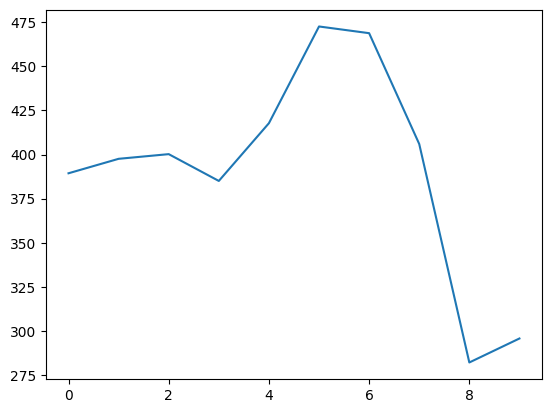

In [18]:
import matplotlib.pyplot as plt
p=df.loc[df['dte'] == 6, 'Open']
p = p.reset_index(drop=True)
q=df.loc[df['dte'] == 6, 'Date']
plt.plot(p)
print(p)
print(q)

In [19]:
# Preprocessing the data frame
df['Date'] = df['Date'].str[4:]
df['Date'] = df['Date'] + '/24'
df

,Expiry,Date,Open,High,Low,Close,Intraday,Tonight,Index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,dte
0,14-03-2024,14/03/24,144.60,156.80,2.70,3.40,141.20,0.00,Open,High,Low,Close,Intraday,Gap,0
1,07-03-2024,07/03/24,118.00,118.00,4.65,6.55,111.45,0.00,21956,22201.9,21928.65,22144.95,273.25,0,0
2,29-02-2024,29/02/24,153.70,169.60,13.80,16.25,137.45,0.00,22498.05,22519.6,22439.2,22483.6,80.4,0,0
3,22-02-2024,22/02/24,124.65,150.55,13.95,17.90,106.75,0.00,21922.45,22055.7,21865.55,22050.7,190.15,0,0
4,15-02-2024,15/02/24,122.05,126.00,8.40,10.75,111.30,0.00,22051.1,22243.85,21881.7,22225.55,362.15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,08-02-2024,29/01/24,493.45,538.00,493.45,523.30,-29.85,-3.40,21475.4,21759.6,21468.15,21751.05,291.45,-41.5,8
86,01-02-2024,19/01/24,485.70,490.00,457.85,467.55,18.15,27.25,21615.55,21668.05,21579.2,21636.1,88.85,75.75,8
87,25-01-2024,15/01/24,386.00,403.50,384.95,389.95,-3.95,8.90,22027.5,22110.7,21971.7,22105.8,139,43.6,8
88,18-01-2024,08/01/24,335.45,358.25,326.00,349.30,-13.85,36.95,21732.65,21763.4,21496.1,21508.85,267.3,-139.85,8


In [20]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')
df['Expiry']=pd.to_datetime(df['Expiry'], format='%d-%m-%Y')

In [21]:
df

,Expiry,Date,Open,High,Low,Close,Intraday,Tonight,Index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,dte
0,2024-03-14,2024-03-14,144.60,156.80,2.70,3.40,141.20,0.00,Open,High,Low,Close,Intraday,Gap,0
1,2024-03-07,2024-03-07,118.00,118.00,4.65,6.55,111.45,0.00,21956,22201.9,21928.65,22144.95,273.25,0,0
2,2024-02-29,2024-02-29,153.70,169.60,13.80,16.25,137.45,0.00,22498.05,22519.6,22439.2,22483.6,80.4,0,0
3,2024-02-22,2024-02-22,124.65,150.55,13.95,17.90,106.75,0.00,21922.45,22055.7,21865.55,22050.7,190.15,0,0
4,2024-02-15,2024-02-15,122.05,126.00,8.40,10.75,111.30,0.00,22051.1,22243.85,21881.7,22225.55,362.15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2024-02-08,2024-01-29,493.45,538.00,493.45,523.30,-29.85,-3.40,21475.4,21759.6,21468.15,21751.05,291.45,-41.5,8
86,2024-02-01,2024-01-19,485.70,490.00,457.85,467.55,18.15,27.25,21615.55,21668.05,21579.2,21636.1,88.85,75.75,8
87,2024-01-25,2024-01-15,386.00,403.50,384.95,389.95,-3.95,8.90,22027.5,22110.7,21971.7,22105.8,139,43.6,8
88,2024-01-18,2024-01-08,335.45,358.25,326.00,349.30,-13.85,36.95,21732.65,21763.4,21496.1,21508.85,267.3,-139.85,8


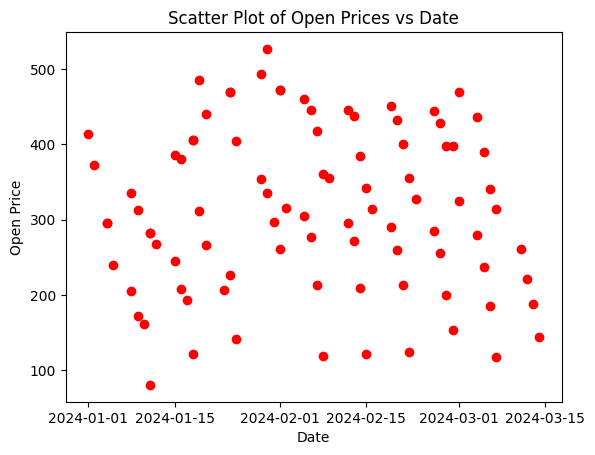

In [22]:
plt.scatter(df['Date'], df['Open'], c='r')
plt.title("Scatter Plot of Open Prices vs Date")
plt.xlabel("Date")
plt.ylabel("Open Price")
plt.show()

In [23]:
filtered_df = df[df['Expiry'] == '2024-03-14']
filtered_df

,Expiry,Date,Open,High,Low,Close,Intraday,Tonight,Index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,dte
0,2024-03-14,2024-03-14,144.60,156.80,2.70,3.40,141.20,0.00,Open,High,Low,Close,Intraday,Gap,0
5,2024-03-14,2024-03-13,187.65,224.55,151.35,151.35,36.30,6.75,21894.65,21952,NaN,NaN,NaN,NaN,1
10,2024-03-14,2024-03-12,220.70,233.15,195.25,198.55,22.15,10.90,21560.65,21865,NaN,NaN,NaN,NaN,2
15,2024-03-14,2024-03-11,260.85,260.85,230.55,230.55,30.30,9.85,21656,21764,NaN,NaN,NaN,NaN,3
20,2024-03-14,2024-03-07,314.10,314.10,247.95,254.45,59.65,-6.40,21791.9,21823,NaN,NaN,NaN,NaN,4
25,2024-03-14,2024-03-06,340.05,348.00,314.45,322.10,17.95,8.00,21705.35,21799,NaN,NaN,NaN,NaN,5
30,2024-03-14,2024-03-05,389.40,389.40,339.35,339.35,50.05,-0.70,21979.95,2200,NaN,NaN,NaN,NaN,6
35,2024-03-14,2024-03-04,435.70,435.70,392.35,393.55,42.15,4.15,22036.1,2204,NaN,NaN,NaN,NaN,7
40,2024-03-14,2024-03-01,470.15,485.70,456.45,456.95,13.20,21.25,21798.55,2194,NaN,NaN,NaN,NaN,8


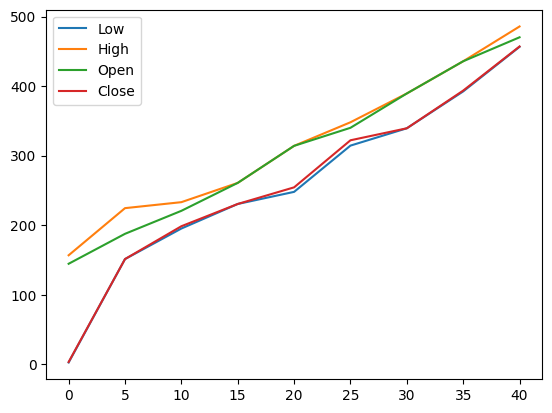

In [24]:
plt.plot(filtered_df['Low'],label='Low')
plt.plot(filtered_df['High'],label='High')
plt.plot(filtered_df['Open'],label='Open')
plt.plot(filtered_df['Close'],label='Close')
plt.legend()

In [25]:
previous_date = filtered_df.loc[[15, 20, 25, 30, 35, 40], 'Date'].tolist()
previous_date.reverse()
previous_open = filtered_df.loc[[15, 20, 25, 30, 35, 40], 'Open'].tolist()
previous_open.reverse()
previous_close = filtered_df.loc[[15, 20, 25, 30, 35, 40], 'Close'].tolist()
previous_close.reverse()
previous_low = filtered_df.loc[[15, 20, 25, 30, 35, 40], 'Low'].tolist()
previous_low.reverse()
previous_high = filtered_df.loc[[15, 20, 25, 30, 35, 40], 'High'].tolist()
previous_high.reverse()

In [26]:
series_open = pd.Series(previous_open, index=previous_date)


series_close = pd.Series(previous_close, index=previous_date)


series_low = pd.Series(previous_low, index=previous_date)

series_high = pd.Series(previous_high, index=previous_date)


In [27]:
previous_date

[Timestamp('2024-03-01 00:00:00'),
 Timestamp('2024-03-04 00:00:00'),
 Timestamp('2024-03-05 00:00:00'),
 Timestamp('2024-03-06 00:00:00'),
 Timestamp('2024-03-07 00:00:00'),
 Timestamp('2024-03-11 00:00:00')]

In [36]:
warnings.filterwarnings("ignore")

# Fitting SARIMA model
order = (1, 1, 1)  
seasonal_order = (1, 0, 1, 7) 
model = SARIMAX(series_open, order=order, seasonal_order=seasonal_order)
result = model.fit()

# Forecasting next day's stock price
forecast_open = result.forecast(steps=1)
next_day_open = forecast_open.iloc[0]

print("Open price for the next day:", next_day_open)

Open price for the next day: 219.61297372128655


In [37]:
model = SARIMAX(series_close, order=order, seasonal_order=seasonal_order)
result = model.fit()

# Forecasting next day's stock price
forecast_close = result.forecast(steps=1)
next_day_close = forecast_close.iloc[-1]

print("Close price for the next day:", next_day_close)

Close price for the next day: 187.8718494806144


In [38]:
model = SARIMAX(series_low, order=order, seasonal_order=seasonal_order)
result = model.fit()

# Forecasting next day's stock price
forecast_low = result.forecast(steps=1)
next_day_low = forecast_low.iloc[-1]

print("Low price for the next day:", next_day_low)

Low price for the next day: 214.46805839950477


In [39]:
model = SARIMAX(series_high, order=order, seasonal_order=seasonal_order)
result = model.fit()

# Forecasting next day's stock price
forecast_high = result.forecast(steps=1)
next_day_high = forecast_high.iloc[-1]

print("High price for the next day:", next_day_high)

High price for the next day: 216.11548678503272


In [40]:
data={'Open':[next_day_open],'Close':[next_day_close],'High':[next_day_high],'Low':[next_day_low]}


In [41]:
df2 = pd.DataFrame(data,index=['Straddle Prices on Tuesday'])
df2

,Open,Close,High,Low
Straddle Prices on Tuesday,219.612974,187.871849,216.115487,214.468058
